In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('all.csv')
X = df['Yield Strength (MPa)'].values.reshape(-1, 1)
y = df['Hardness HV (GPa)'].values

In [5]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
y_pred = model.predict(X)
residuals = y - y_pred
std_residuals = (residuals - np.mean(residuals)) / np.std(residuals)


In [7]:

outliers = np.abs(std_residuals) > 2

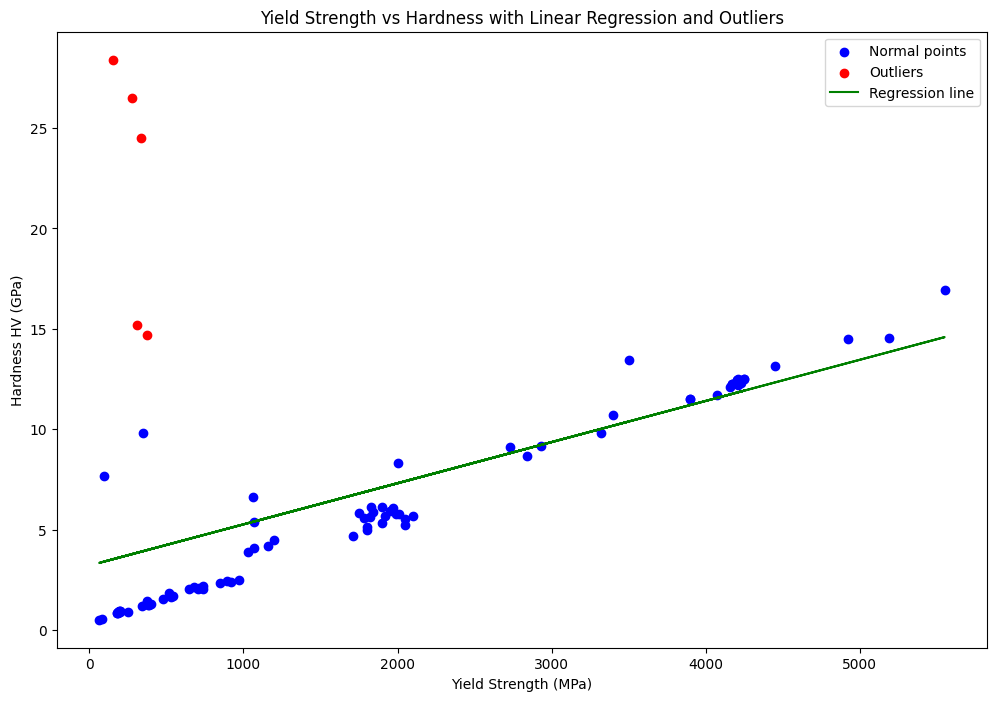

In [8]:
plt.figure(figsize=(12, 8))
plt.scatter(X[~outliers], y[~outliers], color='blue', label='Normal points')
plt.scatter(X[outliers], y[outliers], color='red', label='Outliers')
plt.plot(X, y_pred, color='green', label='Regression line')

plt.title('Yield Strength vs Hardness with Linear Regression and Outliers')
plt.xlabel('Yield Strength (MPa)')
plt.ylabel('Hardness HV (GPa)')
plt.legend()

In [9]:

print(f"Slope: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared: {r2_score(y, y_pred):.4f}")
print(f"Mean squared error: {mean_squared_error(y, y_pred):.4f}")

print("\nOutliers:")
print(df[outliers])

Slope: 0.0020
Intercept: 3.2214
R-squared: 0.2918
Mean squared error: 24.4851

Outliers:
   Alloy Name  Yield Strength (MPa)  Hardness HV (GPa)
23        B4C                 155.0               28.4
24      Si3N4                 375.0               14.7
25      Al2O3                 310.0               15.2
26        SiC                 335.0               24.5
27       TiB2                 275.0               26.5


In [11]:

df_clean = df[~outliers]
X_clean = df_clean['Yield Strength (MPa)'].values.reshape(-1, 1)
y_clean = df_clean['Hardness HV (GPa)'].values


In [12]:

model_clean = LinearRegression()
model_clean.fit(X_clean, y_clean)
y_pred_clean = model_clean.predict(X_clean)

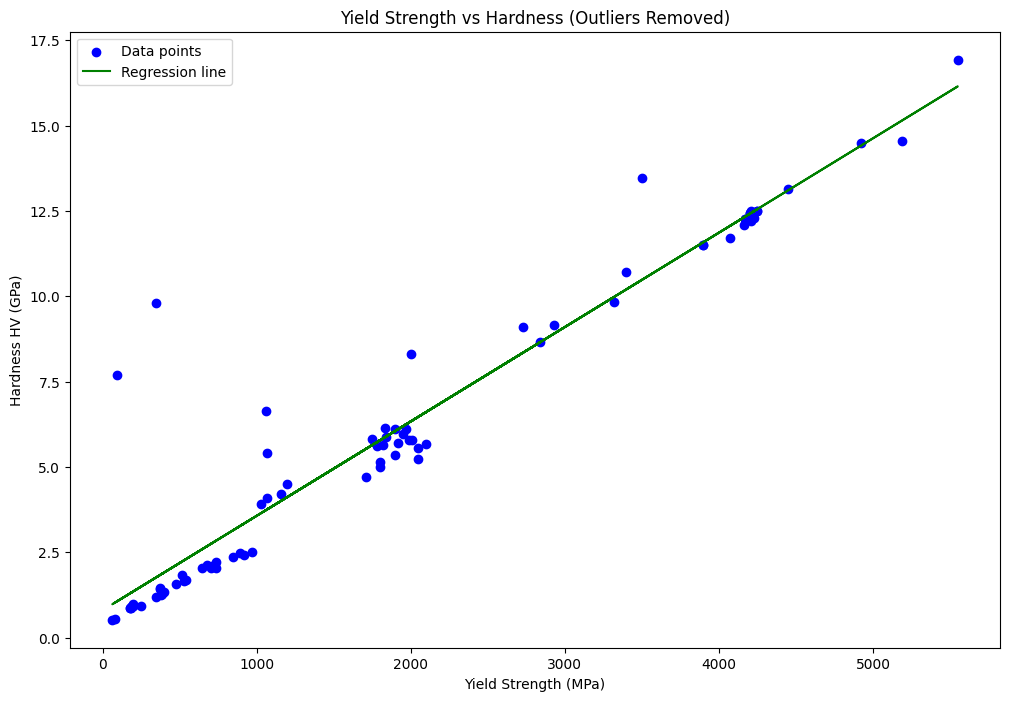

In [13]:

plt.figure(figsize=(12, 8))
plt.scatter(X_clean, y_clean, color='blue', label='Data points')
plt.plot(X_clean, y_pred_clean, color='green', label='Regression line')

plt.title('Yield Strength vs Hardness (Outliers Removed)')
plt.xlabel('Yield Strength (MPa)')
plt.ylabel('Hardness HV (GPa)')
plt.legend()


In [14]:
print("Model statistics after removing outliers:")
print(f"Slope: {model_clean.coef_[0]:.4f}")
print(f"Intercept: {model_clean.intercept_:.4f}")
print(f"R-squared: {r2_score(y_clean, y_pred_clean):.4f}")
print(f"Mean squared error: {mean_squared_error(y_clean, y_pred_clean):.4f}")


Model statistics after removing outliers:
Slope: 0.0028
Intercept: 0.8002
R-squared: 0.9094
Mean squared error: 1.8355
